# Centralities
We work on the subgraph of the largest community. The corresponding function that helps you to obtain this graph is part of our utility package and called `subgraph_largest_community()`. NetworkX's centralities are documented [here](https://networkx.org/documentation/stable/reference/algorithms/centrality.html). In the box below, you see the imports, including our Neo4j utility, which is a singleton that includes the necessary functions we implemented in the previous tutorials.


In [1]:
import sys
import os
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Define the directory containing neo4j_utils.py (assuming test.ipynb is in task_1 folder)
module_path = os.path.abspath(os.path.join(os.path.dirname("__file__"), '..', 'utils'))

# Check if the path is already in sys.path and add it if not
if module_path not in sys.path:
    print(f"Adding {module_path} to sys.path")
    sys.path.append(module_path)

import neo4j_utils as neo4j

# Get the instance of the Neo4jConnection
db = neo4j.Neo4jConnection.get_instance()

# Verify the connection
if db.verify_connection():
    print("Connection to Neo4j is successful!")
else:
    print("Connection to Neo4j failed!")

# close the connection
db.close()

Adding /Users/ramadanomar/projects/dsis-2024/Graph_Data_Analytics/utils to sys.path
Connection to Neo4j is successful!


## Degree Centrality
Below, you will find an example using NetworkX to calculate Degree Centrality.


In [2]:
# Get the instance of the Neo4jConnection
db = neo4j.Neo4jConnection.get_instance()

# Load subgraph of largest community
subgraph = db.subgraph_largest_community()

# Calculate degree centrality for all nodes using NetworkX function
degree_centrality = nx.degree_centrality(subgraph)

# Print the degree centrality values
print("Degree centrality for nodes in the largest community subgraph:")
for node, centrality in degree_centrality.items():
    print(f"Node: {node}, Degree Centrality: {centrality}")

# Close the Neo4j connection when done
db.close()

Degree centrality for nodes in the largest community subgraph:
Node: Hake, Degree Centrality: 0.006060606060606061
Node: Mully, Degree Centrality: 0.05454545454545454
Node: Ulmer, Degree Centrality: 0.006060606060606061
Node: Weeper, Degree Centrality: 0.030303030303030304
Node: Big-Boil, Degree Centrality: 0.012121212121212121
Node: Harma, Degree Centrality: 0.048484848484848485
Node: Thoren-Smallwood, Degree Centrality: 0.05454545454545454
Node: Lyanna-Mormont, Degree Centrality: 0.006060606060606061
Node: Salladhor-Saan, Degree Centrality: 0.030303030303030304
Node: Othell-Yarwyck, Degree Centrality: 0.06666666666666667
Node: Ryk, Degree Centrality: 0.024242424242424242
Node: Cotter-Pyke, Degree Centrality: 0.06060606060606061
Node: Patrek-of-Kings-Mountain, Degree Centrality: 0.024242424242424242
Node: Rattleshirt, Degree Centrality: 0.06666666666666667
Node: Halder, Degree Centrality: 0.048484848484848485
Node: Dareon, Degree Centrality: 0.030303030303030304
Node: Xhondo, Degree C

## Task 3.1: Betweenness Centrality
Please follow the example provided above. This time, we will compute the betweenness centrality.


In [4]:
# Get the instance of the Neo4jConnection
db = neo4j.Neo4jConnection.get_instance()

# Load subgraph of largest community
subgraph = db.subgraph_largest_community()

# Calculate betweeness centrality for all nodes using NetworkX function
betweeness_centrality = nx.betweenness_centrality(subgraph)

# Print the betweeness centrality values
print("Betweeness centrality for nodes in the largest community subgraph:")
for node, centrality in betweeness_centrality.items():
    print(f"Node: {node}, Betweeness Centrality: {centrality}")

# close the connection
db.close()

Betweeness centrality for nodes in the largest community subgraph:
Node: Hake, Betweeness Centrality: 0.0
Node: Mully, Betweeness Centrality: 0.0008718427011109938
Node: Ulmer, Betweeness Centrality: 0.0
Node: Weeper, Betweeness Centrality: 0.00014781966001478197
Node: Big-Boil, Betweeness Centrality: 0.0
Node: Harma, Betweeness Centrality: 0.0008446837715130397
Node: Thoren-Smallwood, Betweeness Centrality: 0.01294205917265784
Node: Lyanna-Mormont, Betweeness Centrality: 0.0
Node: Salladhor-Saan, Betweeness Centrality: 0.00014432947359776632
Node: Othell-Yarwyck, Betweeness Centrality: 0.0008307230258449771
Node: Ryk, Betweeness Centrality: 0.0
Node: Cotter-Pyke, Betweeness Centrality: 0.003448626649516358
Node: Patrek-of-Kings-Mountain, Betweeness Centrality: 2.463661000246366e-05
Node: Rattleshirt, Betweeness Centrality: 0.001955343333421289
Node: Halder, Betweeness Centrality: 0.000514083928718075
Node: Dareon, Betweeness Centrality: 0.01212121212121212
Node: Xhondo, Betweeness Cen

## Task 3.2: Closeness Centrality
Please follow the example provided above to compute the closeness centrality.


In [5]:
# Get the instance of the Neo4jConnection
db = neo4j.Neo4jConnection.get_instance()

# Load subgraph of largest community
subgraph = db.subgraph_largest_community()

# Calculate betweeness centrality for all nodes using NetworkX function
closeness_centrality = nx.closeness_centrality(subgraph)

# Print the closeness centrality values
print("Closeness centrality for nodes in the largest community subgraph:")
for node, centrality in closeness_centrality.items():
    print(f"Node: {node}, Closeness Centrality: {centrality}")

# close the connection
db.close()

Closeness centrality for nodes in the largest community subgraph:
Node: Hake, Closeness Centrality: 0.3793103448275862
Node: Mully, Closeness Centrality: 0.3893805309734513
Node: Ulmer, Closeness Centrality: 0.3793103448275862
Node: Weeper, Closeness Centrality: 0.38427947598253276
Node: Big-Boil, Closeness Centrality: 0.38095238095238093
Node: Thoren-Smallwood, Closeness Centrality: 0.39461883408071746
Node: Harma, Closeness Centrality: 0.3902439024390244
Node: Lyanna-Mormont, Closeness Centrality: 0.3404255319148936
Node: Salladhor-Saan, Closeness Centrality: 0.35699797160243407
Node: Othell-Yarwyck, Closeness Centrality: 0.39111111111111113
Node: Ryk, Closeness Centrality: 0.38427947598253276
Node: Cotter-Pyke, Closeness Centrality: 0.4489795918367347
Node: Patrek-of-Kings-Mountain, Closeness Centrality: 0.3955056179775281
Node: Rattleshirt, Closeness Centrality: 0.4045977011494253
Node: Halder, Closeness Centrality: 0.40274599542334094
Node: Xhondo, Closeness Centrality: 0.33523809

## Example Visualization: Degree Centrality in the Largest Community


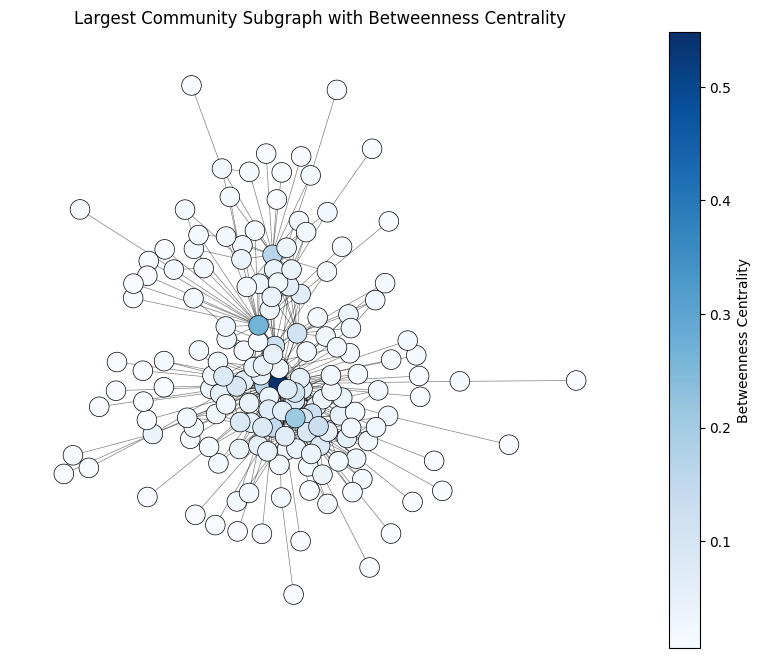

In [6]:
# Get the instance of the Neo4jConnection
db = neo4j.Neo4jConnection.get_instance()

# Load data into NetworkX
graph = db.load_data_into_networkx()

# Load subgraph of largest community
largest_community = db.subgraph_largest_community()

# Calculate betweenness centrality for all nodes in the largest community using NetworkX function
betweenness_centrality = nx.degree_centrality(largest_community)

# Draw the largest community subgraph with node colors based on betweenness centrality
pos = nx.spring_layout(largest_community, k=0.5, iterations=1000)
plt.figure(figsize=(10, 8))

# Draw nodes with colors based on betweenness centrality
node_size = 200
node_color = list(betweenness_centrality.values())
nodes = nx.draw_networkx_nodes(largest_community, pos, node_size=node_size, cmap=plt.cm.Blues,
                               node_color=node_color, edgecolors='k', linewidths=0.5)
nx.draw_networkx_edges(largest_community, pos, alpha=0.5, width=0.5)

plt.colorbar(nodes, label='Betweenness Centrality')  # Add colorbar for node colors
plt.title('Largest Community Subgraph with Betweenness Centrality')
plt.axis('off')
plt.show()

# Close the Neo4j connection when done
db.close()